In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [104]:
df = pd.read_csv('E:/Machine Learning Zoomcamp/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')
bdf = pd.read_csv('E:/Machine Learning Zoomcamp/dataset/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [105]:
df.head().T


,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [106]:
df.columns = df.columns.str.lower().str.replace(' ','_')
df.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [107]:
catogoris = list(df.dtypes[df.dtypes == 'object'].index)
catogoris

['customerid',
 'gender',
 'partner',
 'dependents',
 'phoneservice',
 'multiplelines',
 'internetservice',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'contract',
 'paperlessbilling',
 'paymentmethod',
 'totalcharges',
 'churn']

In [108]:
for c in catogoris: 
    df[c] = df[c].str.lower().str.replace(' ','_')
    

In [109]:
df.head().T
df.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges         object
churn                object
dtype: object

#### here the seniocitizen is a integer ane the totalcharges is an object we have to change that

In [110]:
df.totalcharges = pd.to_numeric(df.totalcharges,errors="coerce")
df.totalcharges

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: totalcharges, Length: 7043, dtype: float64

In [111]:
df.totalcharges = df.totalcharges.fillna(0)
df.totalcharges.isnull().sum()

0

In [112]:
df[df['totalcharges'].isnull()][['customerid', 'totalcharges']]


,customerid,totalcharges


#### now convert the churn variable

In [113]:
df.churn.head()

0     no
1     no
2    yes
3     no
4    yes
Name: churn, dtype: object

In [114]:
(df.churn == 'yes').astype(int).head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int32

In [115]:
df.churn = (df.churn == 'yes').astype(int)

## 3.3 Setting up the validation framework
#### spliting train/validation/test set with Scikit-Learn

In [116]:
from sklearn.model_selection import train_test_split
len(df)

7043

In [117]:
df_full_train, df_test = train_test_split(df,test_size=0.2,random_state=1)

In [118]:
len(df_full_train),len(df_test)

(5634, 1409)

In [119]:
df_train,df_val = train_test_split(df_full_train,test_size=0.25,random_state=1)

In [120]:
len(df_train),len(df_val)

(4225, 1409)

In [121]:
len(df_train)+len(df_val)+len(df_test),len(df)

(7043, 7043)

In [122]:
df_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
3897,8015-ihcgw,female,0,yes,yes,72,yes,yes,fiber_optic,yes,...,yes,yes,yes,yes,two_year,yes,electronic_check,115.50,8425.15,0
1980,1960-uycnn,male,0,no,no,10,yes,yes,fiber_optic,no,...,yes,no,no,yes,month-to-month,yes,electronic_check,95.25,1021.55,0
6302,9250-wypll,female,0,no,no,5,yes,yes,fiber_optic,no,...,no,no,no,no,month-to-month,no,electronic_check,75.55,413.65,1
727,6786-obwqr,female,0,yes,yes,5,yes,no,fiber_optic,no,...,no,no,yes,no,month-to-month,yes,electronic_check,80.85,356.10,0
5104,1328-euzhc,female,0,yes,no,18,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,20.10,370.50,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3774,1309-xgfsn,male,1,yes,yes,52,yes,yes,dsl,no,...,yes,no,yes,yes,one_year,yes,electronic_check,80.85,4079.55,0
6108,4819-hjpiw,male,0,no,no,18,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,no,mailed_check,25.15,476.80,0
1530,3703-vavcl,male,0,yes,yes,2,yes,no,fiber_optic,no,...,yes,yes,no,yes,month-to-month,no,credit_card_(automatic),90.00,190.05,1
3701,3812-lrzir,female,0,yes,yes,27,yes,yes,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,electronic_check,24.50,761.95,0


now reset the index

In [123]:
df_train = df_train.reset_index(drop=True)
df_val   = df_val.reset_index(drop=True)
df_test  = df_test.reset_index(drop=True)
 

In [124]:
y_train = df_train.churn.values
y_val   = df_val.churn.values
y_test  = df_test.churn.values

In [125]:
del df_train['churn']
del df_val['churn']
del df_test['churn']

## 3.4 EDA
 * check missing value
 * look at the target variable (churn)
 * look at the numberical and categorical variables

In [126]:
df_full_train = df_full_train.reset_index(drop= True)
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,5442-pptjy,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.70,258.35,0
1,6261-rcvns,female,0,no,no,42,yes,no,dsl,yes,...,yes,yes,no,yes,one_year,no,credit_card_(automatic),73.90,3160.55,1
2,2176-osjuv,male,0,yes,no,71,yes,yes,dsl,yes,...,no,yes,no,no,two_year,no,bank_transfer_(automatic),65.15,4681.75,0
3,6161-erdgd,male,0,yes,yes,71,yes,yes,dsl,yes,...,yes,yes,yes,yes,one_year,no,electronic_check,85.45,6300.85,0
4,2364-ufrom,male,0,no,no,30,yes,no,dsl,yes,...,no,yes,yes,no,one_year,no,electronic_check,70.40,2044.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0781-lkxbr,male,1,no,no,9,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,100.50,918.60,1
5630,3507-gasnp,male,0,no,yes,60,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,two_year,no,mailed_check,19.95,1189.90,0
5631,8868-wozgu,male,0,no,no,28,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,105.70,2979.50,1
5632,1251-krreg,male,0,no,no,2,yes,yes,dsl,no,...,no,no,no,no,month-to-month,yes,mailed_check,54.40,114.10,1


In [127]:
df_full_train.isnull().sum()

customerid          0
gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [128]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.730032
1    0.269968
Name: proportion, dtype: float64

In [129]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate,2)

0.27

In [130]:
df_full_train.dtypes

customerid           object
gender               object
seniorcitizen         int64
partner              object
dependents           object
tenure                int64
phoneservice         object
multiplelines        object
internetservice      object
onlinesecurity       object
onlinebackup         object
deviceprotection     object
techsupport          object
streamingtv          object
streamingmovies      object
contract             object
paperlessbilling     object
paymentmethod        object
monthlycharges      float64
totalcharges        float64
churn                 int32
dtype: object

In [131]:
numerical = ['tenure','monthlycharges','totalcharges']

In [132]:
df_full_train.columns

Index(['customerid', 'gender', 'seniorcitizen', 'partner', 'dependents',
       'tenure', 'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod', 'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [133]:
catogorical = [ 'gender', 'seniorcitizen', 'partner', 'dependents',
       'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [134]:
df_full_train[catogorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

## 3.5 Feature importance: churn rate and risk ratio
Feature importance analysis(part of EDA) - identifying which feature affects our target variable
  * Churn rate
  * Risk ratio
  * Mutual information - later

In [135]:
y_val.mean(), y_test.mean()

(0.2739531582682754, 0.24698367636621718)

In [136]:
churn_male = df_full_train[df_full_train.gender == 'male'].churn.mean()
churn_male

0.2632135306553911

In [137]:
churn_female = df_full_train[df_full_train.gender == 'female'].churn.mean()
churn_female

0.27682403433476394

In [138]:
global_churn = df_full_train.churn.mean()
global_churn

0.26996805111821087

In [139]:
df_full_train.partner.value_counts()

partner
no     2932
yes    2702
Name: count, dtype: int64

In [140]:
churn_partner =  df_full_train[df_full_train.partner == 'yes'].churn.mean()
churn_partner

0.20503330866025166

In [141]:
churn_no_partner =  df_full_train[df_full_train.partner == 'no'].churn.mean()
churn_no_partner

0.3298090040927694

#### difference


In [142]:
global_churn - churn_partner

0.06493474245795922

In [143]:
global_churn - churn_male

0.006754520462819769

#### Risk ratio

In [144]:
churn_no_partner/ global_churn

1.2216593879412643

In [145]:
churn_partner/global_churn

0.7594724924338315

In [146]:
df_group = df_full_train.groupby('gender').churn.agg(['mean','count'])
df_group['diff'] = df_group['mean'] - global_churn
df_group['risk'] = df_group['mean'] / global_churn
df_group

,mean,count,diff,risk
gender,,,,
female,0.276824,2796,0.006856,1.025396
male,0.263214,2838,-0.006755,0.974980


In [147]:
for c in catogorical:
    print( "                    ",c.upper())
    df_group = df_full_train.groupby(c).churn.agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_churn
    df_group['risk'] = df_group['mean'] / global_churn
    print(df_group,'\n\n')

                     GENDER
            mean  count      diff      risk
gender                                     
female  0.276824   2796  0.006856  1.025396
male    0.263214   2838 -0.006755  0.974980 


                     SENIORCITIZEN
                   mean  count      diff      risk
seniorcitizen                                     
0              0.242270   4722 -0.027698  0.897403
1              0.413377    912  0.143409  1.531208 


                     PARTNER
             mean  count      diff      risk
partner                                     
no       0.329809   2932  0.059841  1.221659
yes      0.205033   2702 -0.064935  0.759472 


                     DEPENDENTS
                mean  count      diff      risk
dependents                                     
no          0.313760   3968  0.043792  1.162212
yes         0.165666   1666 -0.104302  0.613651 


                     PHONESERVICE
                  mean  count      diff      risk
phoneservice                

## 3.6 Future Importance: Mutual information

In [148]:
from sklearn.metrics import mutual_info_score

In [149]:
mutual_info_score(df_full_train.churn, df_full_train.contract)

0.0983203874041556

In [150]:
mutual_info_score(df_full_train.churn, df_full_train.gender)

0.0001174846211139946

In [151]:
mutual_info_score(df_full_train.churn, df_full_train.partner)

0.009967689095399745

In [152]:
mutual_info_score(df_full_train.churn, df_full_train.paymentmethod)

0.043210027531582915

In [153]:
for c in catogorical:
    print(c,'=', round(mutual_info_score(df_full_train.churn, df_full_train[c]),6))

gender = 0.000117
seniorcitizen = 0.00941
partner = 0.009968
dependents = 0.012346
phoneservice = 0.000229
multiplelines = 0.000857
internetservice = 0.055868
onlinesecurity = 0.063085
onlinebackup = 0.046923
deviceprotection = 0.043453
techsupport = 0.061032
streamingtv = 0.031853
streamingmovies = 0.031581
contract = 0.09832
paperlessbilling = 0.017589
paymentmethod = 0.04321


do the same with apply method


In [154]:
def mutual_info_churn_score(series):
    return mutual_info_score(series,df_full_train.churn)

In [155]:
mi = df_full_train[catogorical].apply(mutual_info_churn_score)
mi

gender              0.000117
seniorcitizen       0.009410
partner             0.009968
dependents          0.012346
phoneservice        0.000229
multiplelines       0.000857
internetservice     0.055868
onlinesecurity      0.063085
onlinebackup        0.046923
deviceprotection    0.043453
techsupport         0.061032
streamingtv         0.031853
streamingmovies     0.031581
contract            0.098320
paperlessbilling    0.017589
paymentmethod       0.043210
dtype: float64

In [156]:
mi.sort_values(ascending=False)

contract            0.098320
onlinesecurity      0.063085
techsupport         0.061032
internetservice     0.055868
onlinebackup        0.046923
deviceprotection    0.043453
paymentmethod       0.043210
streamingtv         0.031853
streamingmovies     0.031581
paperlessbilling    0.017589
dependents          0.012346
partner             0.009968
seniorcitizen       0.009410
multiplelines       0.000857
phoneservice        0.000229
gender              0.000117
dtype: float64

## 3.7 Future importance: Correlation
how about numerical columns?
  * Correlation coefficient

In [157]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.351885
monthlycharges    0.196805
totalcharges     -0.196353
dtype: float64

In [158]:
df_full_train[df_full_train.tenure < 2].churn.mean()


0.6247464503042597

In [159]:
df_full_train[df_full_train.tenure > 2].churn.mean()


0.22478269658378816

In [160]:
df_full_train[df_full_train.tenure  > 12].churn.mean()


0.17634908339788277

so the when the tenure increases the chance of churn is decreases

In [161]:
df_full_train[df_full_train.monthlycharges  < 20].churn.mean()

0.08829568788501027

In [162]:
df_full_train[df_full_train.monthlycharges  > 80].churn.mean()

0.3447306791569087

when the monthly charges increases the churn rate is also increases

## 3.8 One-hot encoding
  * Use Scikit-Learn to encode categorical features

In [163]:
from sklearn.feature_extraction import DictVectorizer

In [164]:
df_train[['gender','contract']].iloc[:100]

,gender,contract
0,female,two_year
1,male,month-to-month
2,female,month-to-month
3,female,month-to-month
4,female,two_year
...,...,...
95,male,one_year
96,female,month-to-month
97,male,month-to-month
98,male,one_year


In [165]:
dict = df_train[['gender','contract']].iloc[:100].to_dict(orient='records')


In [166]:
dv = DictVectorizer(sparse=False)

In [167]:
dv.fit(dict)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [168]:
dv.get_feature_names_out(dict)

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'gender=female', 'gender=male'], dtype=object)

In [169]:
dv.transform(dict)

array([[0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 0., 1., 1., 0.],
       [1., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0.],
       [1., 0.

In [170]:
train_dict = df_train[catogorical+numerical].to_dict(orient='records')

In [171]:
dv.fit(train_dict)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [172]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [173]:
dv.transform(train_dict)

array([[0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        7.20000e+01, 8.42515e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+01, 1.02155e+03],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        5.00000e+00, 4.13650e+02],
       ...,
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        2.00000e+00, 1.90050e+02],
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 0.00000e+00,
        2.70000e+01, 7.61950e+02],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        9.00000e+00, 7.51650e+02]])

In [174]:
dv.transform(train_dict[:5])[0]

array([0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 1.15500e+02, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
       0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
       0.00000e+00, 0.00000e+00, 1.00000e+00, 7.20000e+01, 8.42515e+03])

In [175]:
list(dv.transform(train_dict[:5])[0])

[0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 115.5,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 72.0,
 8425.15]

In [176]:
X_train = dv.fit_transform(train_dict)

In [177]:
val_dict = df_val[catogorical+numerical].to_dict(orient='records')

In [178]:
X_val = dv.transform(val_dict)

here we only transfor the validation because we already fit the training data

## 3.9 Logistic regression
  * Binary Classification
  * Linear vs Logical regression

In [179]:
def sigmoid (z):
    return 1/(1+np.exp(-z))

In [180]:
z = np.linspace(-7,7,51)
z

array([-7.0000000e+00, -6.7200000e+00, -6.4400000e+00, -6.1600000e+00,
       -5.8800000e+00, -5.6000000e+00, -5.3200000e+00, -5.0400000e+00,
       -4.7600000e+00, -4.4800000e+00, -4.2000000e+00, -3.9200000e+00,
       -3.6400000e+00, -3.3600000e+00, -3.0800000e+00, -2.8000000e+00,
       -2.5200000e+00, -2.2400000e+00, -1.9600000e+00, -1.6800000e+00,
       -1.4000000e+00, -1.1200000e+00, -8.4000000e-01, -5.6000000e-01,
       -2.8000000e-01,  8.8817842e-16,  2.8000000e-01,  5.6000000e-01,
        8.4000000e-01,  1.1200000e+00,  1.4000000e+00,  1.6800000e+00,
        1.9600000e+00,  2.2400000e+00,  2.5200000e+00,  2.8000000e+00,
        3.0800000e+00,  3.3600000e+00,  3.6400000e+00,  3.9200000e+00,
        4.2000000e+00,  4.4800000e+00,  4.7600000e+00,  5.0400000e+00,
        5.3200000e+00,  5.6000000e+00,  5.8800000e+00,  6.1600000e+00,
        6.4400000e+00,  6.7200000e+00,  7.0000000e+00])

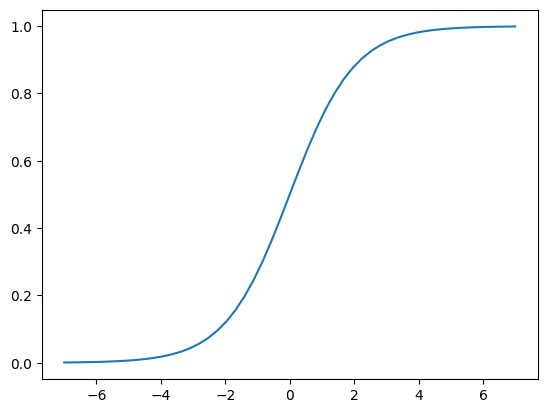

In [181]:
plt.plot(z,sigmoid(z))

In [182]:
def linear_regression(xi):
    result = w0
    for j in range (len(w)):
        result = result + xi[j]*w[j]
    return result

In [183]:
def logical_regression(xi):
    score = w0
    for j in range (len(w)):
        score = score + xi[j]*w[j]
    result = sigmoid(score)
    return result


## 3.10 Training logical regression with Sickit-Learn 
  * Train model with Sickit-learn
  * Apply it to the validation dataset
  * Calculate the accuracy

In [184]:
from sklearn.linear_model import LogisticRegression

In [185]:
model = LogisticRegression(max_iter=5000)
model.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


In [186]:
model.coef_[0].round(3)

array([ 0.681,  0.034, -0.673,  0.057, -0.015,  0.114, -0.16 ,  0.088,
        0.04 ,  0.002, -0.498,  0.7  , -0.16 , -0.018, -0.187,  0.066,
        0.163,  0.117, -0.16 ,  0.085,  0.285, -0.16 , -0.084, -0.161,
        0.203, -0.043,  0.085, -0.052, -0.003,  0.107, -0.011,  0.066,
       -0.024,  0.194, -0.094, -0.16 ,  0.296, -0.054, -0.16 ,  0.256,
        0.236, -0.16 , -0.034, -0.069,  0.   ])

coef_ are the weights

In [187]:
model.intercept_[0]

-0.04496624720194786

intercept means bias in sklearn

In [188]:
model.predict(X_train)

array([0, 1, 1, ..., 1, 0, 1])

these are called hard prediction because they already have labels(target variables)

In [189]:
model.predict_proba(X_train)[:,1]

array([0.0732319 , 0.67596798, 0.63091817, ..., 0.51129653, 0.02571391,
       0.69392433])

In [190]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.00668674, 0.20448892, 0.21754562, ..., 0.15146464, 0.78877177,
       0.81191025])

In [191]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.00668674, 0.20448892, 0.21754562, ..., 0.15146464, 0.78877177,
       0.81191025])

In [192]:
churn_desision = (y_pred >= 0.5)

In [193]:
churn_desision.astype(int)

array([0, 0, 0, ..., 0, 1, 1])

In [194]:
df_val[churn_desision].index

Index([   3,    8,   12,   19,   24,   30,   31,   40,   43,   44,
       ...
       1366, 1368, 1376, 1393, 1394, 1397, 1398, 1399, 1407, 1408],
      dtype='int64', length=315)

In [195]:
(y_val==churn_desision).mean()

0.8034066713981547

we get 80% accuracy
lets see what happens inside

In [196]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_desision.astype(int)
df_pred['actural'] = y_val

In [197]:
df_pred['correct'] = df_pred.prediction ==df_pred.actural.astype(int)

In [198]:
df_pred

,probability,prediction,actural,correct
0,0.006687,0,0,True
1,0.204489,0,0,True
2,0.217546,0,0,True
3,0.564204,1,1,True
4,0.218468,0,0,True
...,...,...,...,...
1404,0.291219,0,0,True
1405,0.041262,0,1,False
1406,0.151465,0,0,True
1407,0.788772,1,1,True


In [199]:
df_pred['correct'].value_counts()

correct
True     1132
False     277
Name: count, dtype: int64

In [200]:
df_pred.correct.mean()

0.8034066713981547

## 3.11 Model Interpretation
  * Look at the coefficients
  * Train a smaller model with fewer features

In [201]:
dv.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'dependents=no', 'dependents=yes',
       'deviceprotection=no', 'deviceprotection=no_internet_service',
       'deviceprotection=yes', 'gender=female', 'gender=male',
       'internetservice=dsl', 'internetservice=fiber_optic',
       'internetservice=no', 'monthlycharges', 'multiplelines=no',
       'multiplelines=no_phone_service', 'multiplelines=yes',
       'onlinebackup=no', 'onlinebackup=no_internet_service',
       'onlinebackup=yes', 'onlinesecurity=no',
       'onlinesecurity=no_internet_service', 'onlinesecurity=yes',
       'paperlessbilling=no', 'paperlessbilling=yes', 'partner=no',
       'partner=yes', 'paymentmethod=bank_transfer_(automatic)',
       'paymentmethod=credit_card_(automatic)',
       'paymentmethod=electronic_check', 'paymentmethod=mailed_check',
       'phoneservice=no', 'phoneservice=yes', 'seniorcitizen',
       'streamingmovies=no', 'streamingmovies=no_internet_service',

In [202]:
model.coef_[0].astype(float)

array([ 6.81030519e-01,  3.42255525e-02, -6.73358655e-01,  5.66409769e-02,
       -1.47435604e-02,  1.14220650e-01, -1.59993005e-01,  8.76697717e-02,
        3.99701939e-02,  1.92722271e-03, -4.97665493e-01,  6.99555915e-01,
       -1.59993005e-01, -1.80440225e-02, -1.87004920e-01,  6.63780954e-02,
        1.62524241e-01,  1.17365459e-01, -1.59993005e-01,  8.45249630e-02,
        2.85417844e-01, -1.59993005e-01, -8.35274217e-02, -1.61319595e-01,
        2.03217012e-01, -4.29954176e-02,  8.48928341e-02, -5.18133454e-02,
       -2.52001654e-03,  1.07472444e-01, -1.12416658e-02,  6.63780954e-02,
       -2.44806789e-02,  1.93797387e-01, -9.38690861e-02, -1.59993005e-01,
        2.95759508e-01, -5.38404382e-02, -1.59993005e-01,  2.55730860e-01,
        2.35620578e-01, -1.59993005e-01, -3.37301563e-02, -6.85208440e-02,
        3.95601510e-04])

In [207]:
import builtins
dict = builtins.dict

In [208]:
dict(zip(dv.get_feature_names_out(),model.coef_[0].round(3)))

{'contract=month-to-month': 0.681,
 'contract=one_year': 0.034,
 'contract=two_year': -0.673,
 'dependents=no': 0.057,
 'dependents=yes': -0.015,
 'deviceprotection=no': 0.114,
 'deviceprotection=no_internet_service': -0.16,
 'deviceprotection=yes': 0.088,
 'gender=female': 0.04,
 'gender=male': 0.002,
 'internetservice=dsl': -0.498,
 'internetservice=fiber_optic': 0.7,
 'internetservice=no': -0.16,
 'monthlycharges': -0.018,
 'multiplelines=no': -0.187,
 'multiplelines=no_phone_service': 0.066,
 'multiplelines=yes': 0.163,
 'onlinebackup=no': 0.117,
 'onlinebackup=no_internet_service': -0.16,
 'onlinebackup=yes': 0.085,
 'onlinesecurity=no': 0.285,
 'onlinesecurity=no_internet_service': -0.16,
 'onlinesecurity=yes': -0.084,
 'paperlessbilling=no': -0.161,
 'paperlessbilling=yes': 0.203,
 'partner=no': -0.043,
 'partner=yes': 0.085,
 'paymentmethod=bank_transfer_(automatic)': -0.052,
 'paymentmethod=credit_card_(automatic)': -0.003,
 'paymentmethod=electronic_check': 0.107,
 'paymentme

In [209]:
small = ['contract','tenure','monthlycharges']

In [210]:
df_train[small].iloc[:10].to_dict(orient='records')

[{'contract': 'two_year', 'tenure': 72, 'monthlycharges': 115.5},
 {'contract': 'month-to-month', 'tenure': 10, 'monthlycharges': 95.25},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 75.55},
 {'contract': 'month-to-month', 'tenure': 5, 'monthlycharges': 80.85},
 {'contract': 'two_year', 'tenure': 18, 'monthlycharges': 20.1},
 {'contract': 'month-to-month', 'tenure': 4, 'monthlycharges': 30.5},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 75.1},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 70.3},
 {'contract': 'two_year', 'tenure': 72, 'monthlycharges': 19.75},
 {'contract': 'month-to-month', 'tenure': 6, 'monthlycharges': 109.9}]

In [211]:
dict_train_small = df_train[small].to_dict(orient='records')
dict_val_small = df_val[small].to_dict(orient='records')

In [212]:
dv_small = DictVectorizer(sparse=False)
dv_small.fit(dict_train_small)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [213]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [214]:
X_train_small = dv_small.transform(dict_train_small)

In [215]:
model_small = LogisticRegression(max_iter=5000)
model_small.fit(X_train_small,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


In [216]:
w0 =  model_small.intercept_
w0

array([-2.4779576])

In [217]:
w = model_small.coef_
w.round(3)

array([[ 0.971, -0.024, -0.948,  0.027, -0.036]])

In [218]:
dict(zip(dv_small.get_feature_names_out(),model_small.coef_[0].round(3)))


{'contract=month-to-month': 0.971,
 'contract=one_year': -0.024,
 'contract=two_year': -0.948,
 'monthlycharges': 0.027,
 'tenure': -0.036}

let assume a customer had 
contract = month to month,
monthly charges = 50,
tenure = 5

In [219]:
sigmoid(-2.47 + 0.971 + 50*0.027+5*(-0.036))

0.41848395843712505

In [220]:
-2.47 + 0.971 + 50*0.027+5*(-0.036)

-0.329

In [221]:
sigmoid(_)

0.41848395843712505

## 3.12 Using the model

now we creating the model with full_train dataset

In [222]:
dict_full_train = df_full_train[catogorical+numerical].to_dict(orient='records')

In [223]:
dict_full_train[:3]

[{'gender': 'male',
  'seniorcitizen': 0,
  'partner': 'yes',
  'dependents': 'yes',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'no',
  'onlinesecurity': 'no_internet_service',
  'onlinebackup': 'no_internet_service',
  'deviceprotection': 'no_internet_service',
  'techsupport': 'no_internet_service',
  'streamingtv': 'no_internet_service',
  'streamingmovies': 'no_internet_service',
  'contract': 'two_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'mailed_check',
  'tenure': 12,
  'monthlycharges': 19.7,
  'totalcharges': 258.35},
 {'gender': 'female',
  'seniorcitizen': 0,
  'partner': 'no',
  'dependents': 'no',
  'phoneservice': 'yes',
  'multiplelines': 'no',
  'internetservice': 'dsl',
  'onlinesecurity': 'yes',
  'onlinebackup': 'yes',
  'deviceprotection': 'yes',
  'techsupport': 'yes',
  'streamingtv': 'no',
  'streamingmovies': 'yes',
  'contract': 'one_year',
  'paperlessbilling': 'no',
  'paymentmethod': 'credit_card_(automatic)',
  'tenur

In [224]:
dv_full_train = DictVectorizer(sparse=False)

In [225]:
dv_full_train.fit(dict_full_train)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [226]:
X_full_train = dv_full_train.transform(dict_full_train)

In [227]:
y_full_train = df_full_train.churn.values

In [228]:
model_full = LogisticRegression(max_iter=5000)

In [229]:
model_full.fit(X_full_train,y_full_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,5000
,multi_class,'deprecated'


In [230]:
dict_test = df_test[catogorical+numerical].to_dict(orient='records')

In [231]:
dv_test = DictVectorizer(sparse=False)

In [237]:
dv_test.fit(dict_full_train)

,dtype,<class 'numpy.float64'>
,separator,'='
,sparse,False
,sort,True


In [238]:
X_test = dv_test.transform(dict_test)

In [239]:
y_predict = model_full.predict(X_test)
y_predict

array([0, 0, 0, ..., 0, 0, 1])

In [240]:
churn_desision = (y_pred >= 0.5)

to check the accuracy of the model

In [241]:
(y_predict== y_test).mean()

0.8126330731014905

#### now we using the model

In [242]:
customer  = dict_test[33]
customer

{'gender': 'male',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'yes',
 'phoneservice': 'yes',
 'multiplelines': 'yes',
 'internetservice': 'fiber_optic',
 'onlinesecurity': 'no',
 'onlinebackup': 'yes',
 'deviceprotection': 'no',
 'techsupport': 'yes',
 'streamingtv': 'no',
 'streamingmovies': 'no',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'credit_card_(automatic)',
 'tenure': 27,
 'monthlycharges': 85.2,
 'totalcharges': 2151.6}

In [243]:
X_use = dv_full_train.transform(customer)

In [244]:
model_full.predict(X_use)

array([0])

In [245]:
y_test[33]

0